In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Pool
import sys
import time

In [2]:
def drop_constant_columns(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result
def drop_constant_column1(dataframe):
    try:
        # temp=df.loc[:, "NAME"].var()
        eps = 1e-6
        C = dataframe.columns
        print('Identifing low-variance columns...', end=' ')
        for c in C:
            print(dataframe[c])
            temp = dataframe.loc[:, c]
            variance=dataframe.loc[:, c].var()
            print(variance)
            # temp =  c.var()
        if variance < eps:
            # print('.. %-30s: too low variance ... column ignored'%(c))
            dropped_columns.add(c)
            dataframe.drop(c)
            print('done!')
    except Exception as e:
        print("drop no variance")
        print(str(e))
        # result = dataframe.copy()
        #for column in dataframe.columns:
        #       if dataframe[column].var() < eps:
        #          result = result.drop(column)
    #return result
    #return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]


def classifiers(info):
    print("Here")
    classifier_names = info[0]
    X = info[1]
    training_scores_encoded = info[2]
    df = info[3]
    targetVariable = info[4]
    for classifier_name in classifier_names:
        print("Working on "+classifier_name+"...")
        if (classifier_name == "LinR"):
            try:
                print(df.columns)

                #X_train=
                #y_train=
                #X_test=

                X=df.drop([targetVariable], axis=1).values
                y=df[targetVariable].values
                #from sklearn import preprocessing
                #X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

                scaler = MinMaxScaler(feature_range=(0, 1))
                rescaledX = scaler.fit_transform(X)
                #X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
                #X_train.shape, y_train.shape, X_test.shape
                #Linear Regression
                kfold = KFold(n_splits=10, random_state=42,)
                lin_reg= LinearRegression()
                results_linreg= cross_val_score(lin_reg, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy Regression: ',results_linreg.mean())
            except Exception as e:
                print("Linear Regression")
                print (str(e))

        if (classifier_name == "LogR"):
            try:
                # Logistic Regression
                kfold = KFold(n_splits=10, random_state=42)
                logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
                results_logreg = cross_val_score(logreg, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Logistic regression: ',results_logreg.mean())
            except Exception as e:
                print("error Logistic regression")
                print (str(e))


        if (classifier_name == "KNN"):
            try:
            # Support Vector Machines

                kfold = KFold(n_splits=10, random_state=42)
                svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)
                results_svc = cross_val_score(svc, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy SVC: ',results_svc.mean())
                #Estimate accuracy 0.7643198906356801
                kfold = KFold(n_splits=10, random_state=42)
                knn = KNeighborsClassifier(n_neighbors = 3)
                results_knn = cross_val_score(knn, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy SVM: ',results_knn.mean())
            except Exception as e:
                print("error SVM")
                print (str(e))

        if (classifier_name == "GNB"):
            try:
                # Gaussian Naive Bayes
                kfold = KFold(n_splits=10, random_state=42)
                gaussian = GaussianNB()
                results_gaussian = cross_val_score(gaussian, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy GNB: ',results_gaussian.mean())
            except Exception as e:
                print("error GNB")
                print (str(e))

        if (classifier_name == "Per"):
            try:
                # Perceptron
                kfold = KFold(n_splits=10, random_state=42)
                perceptron = Perceptron(max_iter=1000,tol=1e-3)
                results_perceptron = cross_val_score(perceptron, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Perceptron: ',results_perceptron.mean())
            except Exception as e:
                print("error Perceptron")
                print (str(e))

        if (classifier_name == "LinSVC"):
            try:
                # Linear SVC
                kfold = KFold(n_splits=10, random_state=42)
                linear_svc = LinearSVC(max_iter=1000)
                results_linearsvc= cross_val_score(linear_svc, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Linear SVC: ',results_linearsvc.mean())
            except Exception as e:
                print("error Linear SVC")
                print (str(e))

        if (classifier_name == "SGD"):
            try:
                # Stochastic Gradient Descent
                kfold = KFold(n_splits=10, random_state=42)
                sgd = SGDClassifier(max_iter=1000,tol=1e-3)
                results_sgd = cross_val_score(sgd, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Stochastic Gradient Descent: ',results_sgd.mean())
            except Exception as e:
                print("error Stochastic Gradient Descent")
                print (str(e))

        if (classifier_name == "DT"):
            try:
                # Decision Tree
                kfold = KFold(n_splits=10, random_state=42)
                decision_tree = DecisionTreeClassifier()
                results_decisiontree = cross_val_score(decision_tree, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Decision Tree: ',results_decisiontree.mean())
            except Exception as e:
                print("error Decision Tree")
                print (str(e))

        if (classifier_name == "RF"):
            try:
                # Random Forest
                kfold = KFold(n_splits=10, random_state=42)
                random_forest = RandomForestClassifier(n_estimators=100)
                results_randomforest = cross_val_score(decision_tree, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Random Forest: ',results_randomforest.mean())
            except Exception as e:
                print("error Random Forest")
                print (str(e))

        if (classifier_name == "LDA"):
            try:
                #Linear Discriminant Analysis
                kfold = KFold(n_splits=10, random_state=42)
                clf = LinearDiscriminantAnalysis()
                results_clf = cross_val_score(clf, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Linear Discriminant Analysis: ',results_clf.mean())
            except Exception as e:
                print("error Linear Discriminant Analysis")
                print (str(e))

        if (classifier_name == "Ada_Ensemble"):
            try:
                # Ada Boost Classifier
                kfold = KFold(n_splits=10, random_state=42)
                AB = AdaBoostClassifier()
                results_AB = cross_val_score(AB, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Ada Boost Classifier: ',results_AB.mean())
            except Exception as e:
                print("error  Ada Boost Classifier")
                print (str(e))

        if (classifier_name == "GradBoost_Ensemble"):
            try:
                #AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

                # Gradient Boosting Classifier
                kfold = KFold(n_splits=10, random_state=42)
                GBC = GradientBoostingClassifier()
                results_GBC = cross_val_score(GBC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Gradient Boosting Classifier: ',results_GBC.mean())
            #GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
            except Exception as e:
                print("error Gradient Boosting Classifier")
                print (str(e))

        if (classifier_name == "ETC"):
            try:
                #ExtraTreesClassifier
                kfold = KFold(n_splits=10, random_state=42)
                ETC=ExtraTreesClassifier(n_estimators=100)
                results_ETC = cross_val_score(ETC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy ExtraTreesClassifier: ',results_ETC.mean())
            #ExtraTreesClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
            except Exception as e:
                print("error ExtraTreesClassifier")
                print (str(e))

        if (classifier_name == "XGB"):
            try:
                #XGBClassifier(objective
                xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
                results_xgbs = cross_val_score(xgbs, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy XGBClassifier: ',results_xgbs.mean())
            except Exception as e:
                print("error XGBClassifier")
                print (str(e))

        try:
        #Model evaluation
            print("Model evaluation")
            models = pd.DataFrame({
            'Model': ['Linear Regression','Support Vector Machines', 'KNN', 'Logistic Regression',
                    'Random Forest', 'Naive Bayes', 'Perceptron',
                    'Stochastic Gradient Decent', 'Linear SVC',
                    'Decision Tree','Linear Discriminant Analysis','Ada Boost Classifier','Gradient Boosting Classifier','Extra TreesClassifier','XGB Classifier'],
            'Score': [results_linreg.mean(),results_logreg.mean(),results_svc.mean(),results_knn.mean(),results_gaussian.mean(),results_perceptron.mean(),results_linearsvc.mean(),results_sgd.mean(),results_decisiontree.mean(),results_randomforest.mean(),results_clf.mean(),results_AB.mean(),results_GBC.mean(),results_ETC.mean(),results_xgbs.mean()]})
            print(models.sort_values(by='Score', ascending=False))
        #Model	Score
        except Exception as e:
            print("error Model evaluation, you may be using multiple threads")
            print (str(e))
        

        #def svc_param_selection(X, y, nfolds):
         #   Cs = [0.001, 0.01, 0.1, 1, 10]
          #  gammas = [0.001, 0.01, 0.1, 1]
          #  param_grid = {'C': Cs, 'gamma' : gammas}
          #  grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
           # grid_search.fit(X, y)
           # grid_search.best_params_
           # return grid_search.best_score_, grid_search.best_params_ ,grid_search.best_estimator_
        #svc_param_selection(X, y, 20)


        #def svc_param_selection2(X,y,nfolds):
        #    Cs = [0.001, 0.01, 0.1, 1, 10]
         #   gammas = [0.001, 0.01, 0.1, 1]
          #  kernels = ['linear', 'poly', 'rbf', 'sigmoid']
           # param_dist = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
           # rand = RandomizedSearchCV(SVC(), param_dist, cv=nfolds, scoring='accuracy', n_iter=10, random_state=42)
           # rand.fit(X,y)
           # rand.best_score_
           # rand.best_params_
           # rand.best_estimator_
           # return  rand.best_score_, rand.best_params_ ,rand.best_estimator_
        #svc_param_selection2(X,y,20)

def main():
    import pandas as pd
    dropped_columns = set()
    #targetVariable='V_DISPLAY_SCORE'
    targetVariable='IS_RANKED'
    df=pd.read_csv('novel_corona_cleaned_latest_mod_RANKED3.csv')
    #df = df.drop('NAME', axis=1)
    # number of rows;
    rows=df.shape[0];
    print(df.shape[0])

    # number of columns;
    print("Number of original columns")
    columns=df.shape[1];
    print(df.shape[1])
    # axis=1 means column
    #df = df.drop(targetVariable, axis=1)
    cv=df.dtypes.loc[df.dtypes=='object'].index
    categorical = list(df.select_dtypes(include=['object']).columns.values)
    print (cv)
    print(categorical)
    try:
        # To calculate mean use imputer class

        from sklearn.preprocessing import Imputer
        # Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
        mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

        # Train the imputor on the df dataset
        mean_imputer = mean_imputer.fit(df)
        # imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
        # Apply the imputer to the df dataset
        imputed_df = mean_imputer.transform(df.values)
        # View the data
        imputed_df

        #imputer = imputer.fit(df[:, 1:columns])
        #df[:, 1:columns] = imputer.transform(df[:, 1:columns])
    except Exception as e:
        print("FillNAs")
        print (str(e))
    try:
        print(df.shape)
        print(df.info())
        #On classification problems you need to know how balanced the class values are.( This is an example)
        # positive is the class or target name
        print(df.groupby(targetVariable).size() )
        # We can analyze all the data set
        print(df.describe())
    except Exception as e:
        print("Preprocess errors 2")
        print (str(e))
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    try:
        for cat in categorical:
            print(cat)
            #df[cat].fillna(targetVariable, inplace=True)
            #df[cat] = le.fit_transform(df[cat])
            df[cat] = le.fit_transform(df[cat].astype(str))
         #for i in cv:
          #  df[i]=le.fit_transform(df[i])
           # test[i]=le.fit_transform(test[i])
    except Exception as e:
        print("errorEncoder")
        print (str(e))

    # drop columns with low variance
    try:
        print("variance1")
        # column variance of the dataframe
        print(df.var(axis=0))

        print("variance2")
        # row variance of the dataframe
        print(df.var(axis=1))
        # drop columns with no variance
        #df = df.loc[:, df.var() == 0.0]
        df=drop_constant_column(df)
        threshold = 0.2
        df.drop(df.std()[df.std() < threshold].index.values, axis=1)
        print("Number of columns after dropping low variance")
        columns = df.shape[1];
        print(df.shape[1])
    except Exception as e:
        print("drop low variance")
        print (str(e))
    missing_data=df.isnull()
    # check infinite value
    print("check infinite value, you should get false then true")
    print("now all false")
    print(np.isnan(df.any())) #you should get False
    print("now all true")
    print(np.isfinite(df.all())) #You should get  True
    print("end check infinite values")
    print(missing_data.head(5))
    print(missing_data.sum())
    print(df.head(10))

    #parameter =df[targetVariable].mean() # parameter = "Nan"
    #df[targetVariable].fillna(parameter, inplace = True )
    # Dimmension of Your Data and Data Types


    #We can analyze any colums separate
    #print(df['Pregnancies'].describe())
    # When we have categorical values in the data set, we can create a table and sumarize it
    #print(df.describe(include=['O']))
    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    from pandas.api.types import CategoricalDtype
    from collections import defaultdict
    from sklearn.model_selection import train_test_split
    # apply the categorical dtype
    # define a categorical dtype
    #platforms = ['android', 'ios', 'amazon']
    #platform_category = CategoricalDtype(categories=platforms, ordered=False)
    #df['platform'] = df['platform'].astype(platform_category)

    # create a mapping from all categorical columns that can be used with OrdinalEncoder
    #categorical_columns = list(df.select_dtypes(['category']).columns)
    #category_mapping = [
    #{'col': column_name, 'mapping': list(zip(df[column_name].cat.categories, df[column_name].cat.codes))}
    #for column_name in categorical_columns
    #]
    # clean the data set from nulls, nan, and infitinity values
    def clean_dataset(df):
        assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
        df.dropna(inplace=True)
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
        return df[indices_to_keep].astype(np.float64)
    X=df
    y = pd.DataFrame(data=X, columns=[targetVariable])
    try:
        clean_dataset(df)
    except Exception as e:
        print("error_preprocess_clean_dataset")
        print (str(e))
    #d = defaultdict(LabelEncoder)
    try:

        #ce_ord=ce.OrdinalEncoder(cols=['RANKED_IN','PolarityClass', 'Category'])
        ce_ord = ce.OrdinalEncoder(cols=['IS_RANKED','RANKED_IN','R_C_SAT_ACT_PERCENT'])
        df = ce_ord.fit_transform(df)
        #df = df.apply(lambda x:ce_ord.fit_transform(X))
        outdata=ce_ord.fit_transform(X,y)
        outdata1=outdata[['RatingClass','PolarityClass', 'Category']]
        outdata2 = outdata[['RatingClass', 'Category']]
        outdata3 = outdata[['RatingClass']]
        # we use all columns except PolarityClass as
        # features for training
        label = df[targetVariable]
        label1 = df[targetVariable]
        features = df.drop(targetVariable, 1)
        # the label is PolarityClass

        print(outdata)
    except Exception as e:
        print("error_preprocess0")
        print (str(e))
    # Correlation Between Attributes
    try:
        print(df.corr())
        corr_matrix= df.corr()
        #To check a correlation with our target

        print(corr_matrix[targetVariable].sort_values(ascending=False))
        plt.figure()
        sns.heatmap(df.corr(), vmin=-1, vmax=1.0, fontsize=8, annot=True)
        plt.savefig('corr_matrix.png')
        #plt.show()
    except Exception as e:
        print("error_preprocess1")
        print (str(e))

    #Skew of Univariate Distributions
    #The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
    try:
        print(df.skew())
        #It is better to use some data visualization to get a better idea.
        from matplotlib import pyplot as plt
        df.hist(bins=10, figsize=(20,15))
        plt.savefig('Univariate_Distributions.png')
        #plt.show()
    except Exception as e:
        print("errorUnivariate")
        print (str(e))

    df.plot(kind='box', subplots=True, layout=(54,54), sharex=False, sharey=False, fontsize=8, figsize=(10,15))
    try:
        plt.savefig('boxplot.png')
        #plt.show()
    except Exception as e:
        print("errorUnivariate")
        print (str(e))
    #Scatter Plot Matrix


    #scatter_matrix(df,figsize=(20,20))
    #plt.show()
    # Evaluation for Missing Data
    try:
        missing_data= df.isnull()
        missing_data.head(5)
        print(missing_data.sum())
        for column in missing_data.columns.values.tolist():
            print(column)
            print(missing_data[column].value_counts())
            print("--------------------------------")
        #Finding the porcentage of  missing data
        print(round(((missing_data.sum()/len(missing_data))*100), 4))
        #Lets see our outliers in the data set

        q = df.quantile(0.99)
        print(df [df > q])
        #housing.dropna(subset=["total_bedrooms"]) # option 1

        #housing.drop("total_bedrooms", axis=1) # option 2

        #median = housing["total_bedrooms"].median()

        #housing["total_bedrooms"].fillna(median) # option 3

        #Lets check the types
        print(df.dtypes)
    except Exception as e:
        print("error_Missing Data")
        print (str(e))

    #df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
    #Feature Selection For Machine Learning
    try:
        X=df.drop(targetVariable,axis=1)
        y=df[targetVariable]

        lab_enc = preprocessing.LabelEncoder()
        training_scores_encoded = lab_enc.fit_transform(y)
        print(utils.multiclass.type_of_target(y))
        print(utils.multiclass.type_of_target(training_scores_encoded.astype('int')))
        print(utils.multiclass.type_of_target(training_scores_encoded))
        print(training_scores_encoded)
        #1-Univariete Selection

        #apply SelectKBest class to extract top 10 best features
        bestfeatures = SelectKBest(score_func=chi2, k='all')
        fit = bestfeatures.fit(X,training_scores_encoded)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(X.columns)
        #concat two dataframes for better visualization
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']  #naming the dataframe columns
        print(featureScores.nlargest(10,'Score'))  #print 10 best features
    except Exception as e:
        print("error Feature Selection")
        print (str(e))

    #-Feature Importance

    try:
        model = ExtraTreesClassifier()
        model.fit(X,training_scores_encoded)
        print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
        #plot graph of feature importances for better visualization
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        plt.savefig('important_features.png')
        #plt.show()
    except Exception as e:
        print("error Feature Importance")
        print (str(e))


    #Select the atribites and save the data frame that is ready for use with the machine learning model.

    #Model, predict and solve
    #Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

    #Logistic Regression
    #KNN or k-Nearest Neighbors
    #Support Vector Machines
    #Naive Bayes classifier
    #Decision Tree
    #Random Forrest
    #Perceptron
    #Artificial neural network
    #RVM or Relevance Vector Machine
    #LinearDiscriminantAnalysis
    #AdaBoostClassifier
    #GradientBoostingClassifier ExtraTreesClassifier

    #Load the test,train data.

    CLASSIFIERS = [ "LinR", "LogR", "KNN", "GNB", "Per", "LinSVC", "SGD", "DT", "RF", "LDA", \
        "Ada_Ensemble", "GradBoost_Ensemble", "ETC", "XGB" ]
    if (sys.platform == "win32"): # Windows
        print("Classifier accuracy being obtained with single thread")
        classifiers([CLASSIFIERS ,X, training_scores_encoded, df, targetVariable])

    else:
        print("Classifier accuracy being obtained with multiple threads")
        fourDataSets = [[CLASSIFIERS[0:3] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[4:7] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[8:11] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[12:13] ,X, training_scores_encoded, df, targetVariable]] 

        pool = Pool(processes=4)
        pool.map(classifiers, fourDataSets)

    #classifiers("nothing", X, training_scores_encoded, df)

6342
Number of original columns
9
Index(['Province/State', 'Country/Region', 'Last Update'], dtype='object')
['Province/State', 'Country/Region', 'Last Update']
FillNAs
cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)
(6342, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6342 non-null   object 
 1   Country/Region  6342 non-null   object 
 2   Lat             6342 non-null   float64
 3   Long            6342 non-null   float64
 4   Last Update     6342 non-null   object 
 5   Confirmed       6342 non-null   int64  
 6   Deaths          6342 non-null   int64  
 7   Recovered       6342 non-null   int64  
 8   IS_RANKED       6342 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 446.0+ KB
None
IS_RANKED
1   

[0.16811722 0.17820462 0.29261697 0.28612608 0.0025216  0.03704394
 0.01462327 0.02074631]
Classifier accuracy being obtained with single thread
Here
Working on LinR...
Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered', 'IS_RANKED'],
      dtype='object')
Linear Regression
Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.
Model evaluation
error Model evaluation, you may be using multiple threads
local variable 'results_linreg' referenced before assignment
Working on LogR...
error Logistic regression
Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.
Model evaluation
error Model evaluation, you may be using multiple threads
local variable 'results_linreg' referenced before assignment
Working on KNN...
error SVM
Setting a random_state has no effect since shu

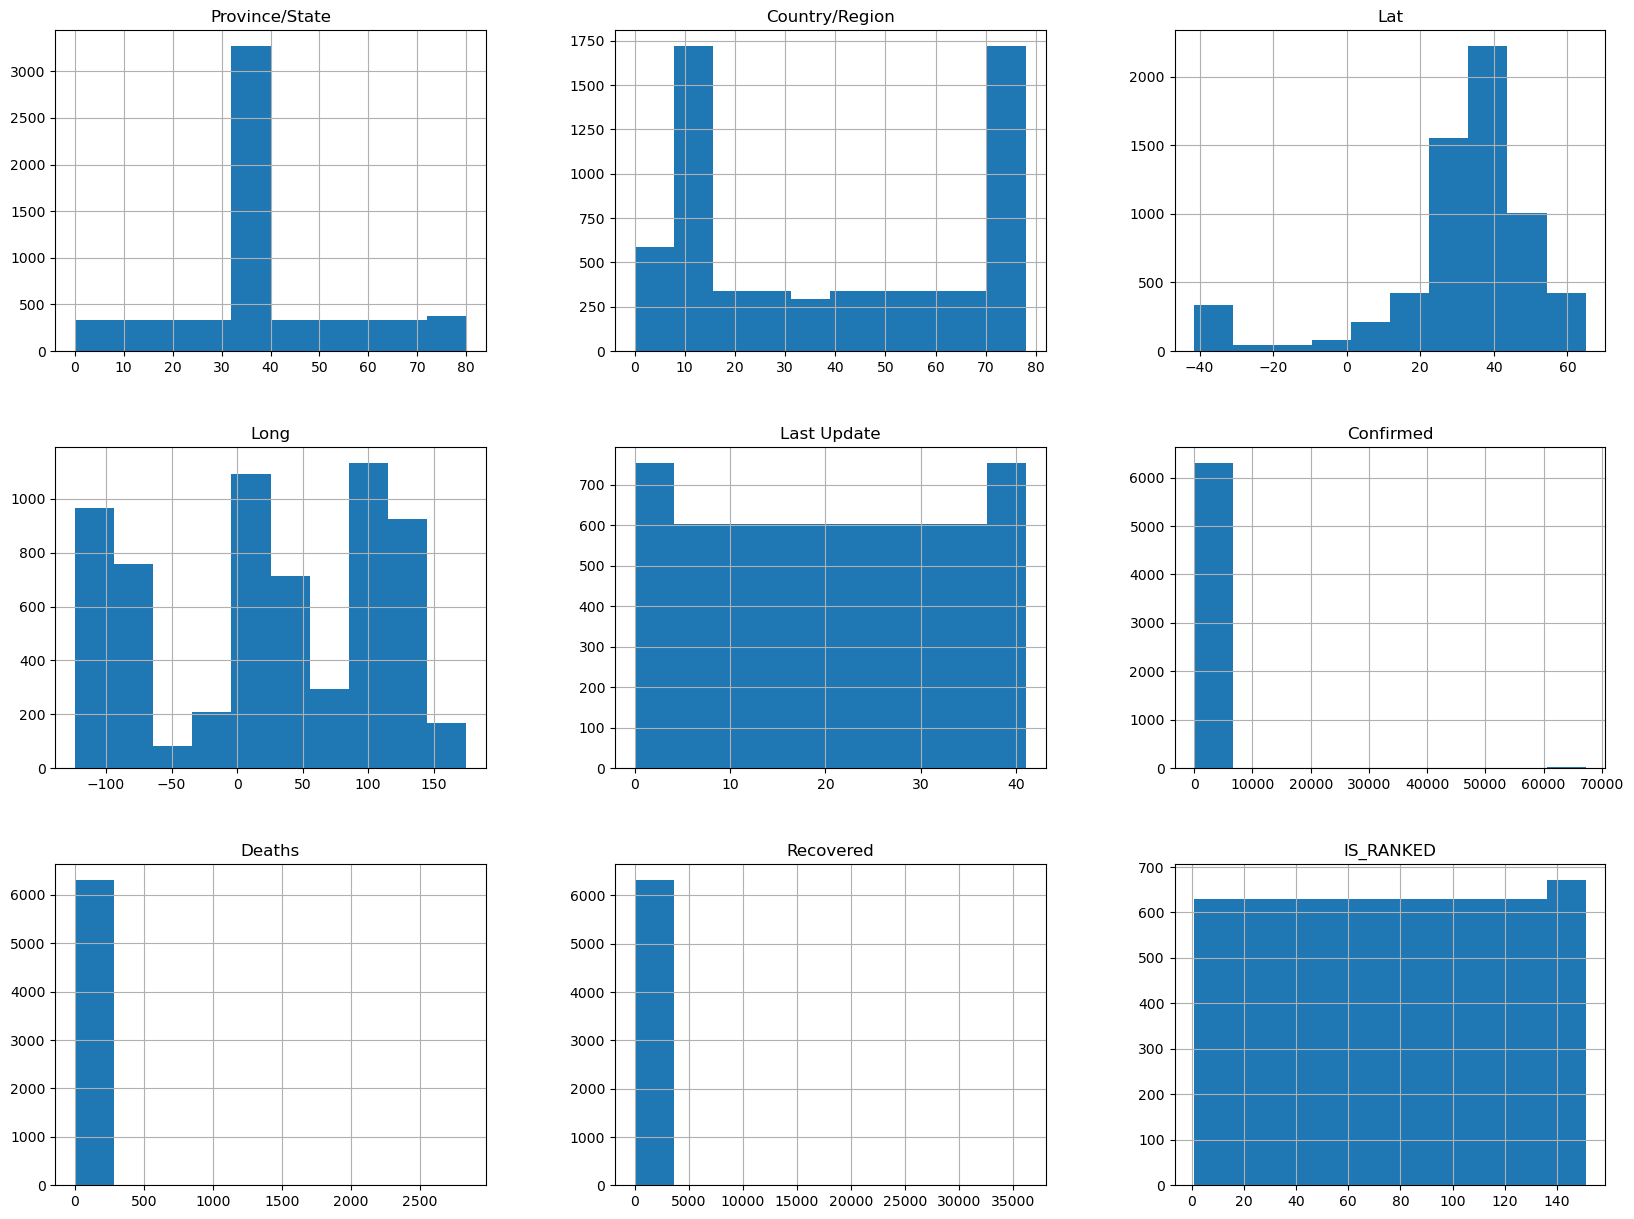

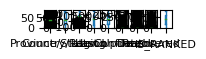

In [3]:
if __name__ == '__main__':
    main()